1. Take last 10 years of data. Average the rain fall by each month and plot both pie and bar chart. Find out which month has the most average rainfall.
Write your detailed observation ? For example which month has the most rainfall and which month has the lowest.

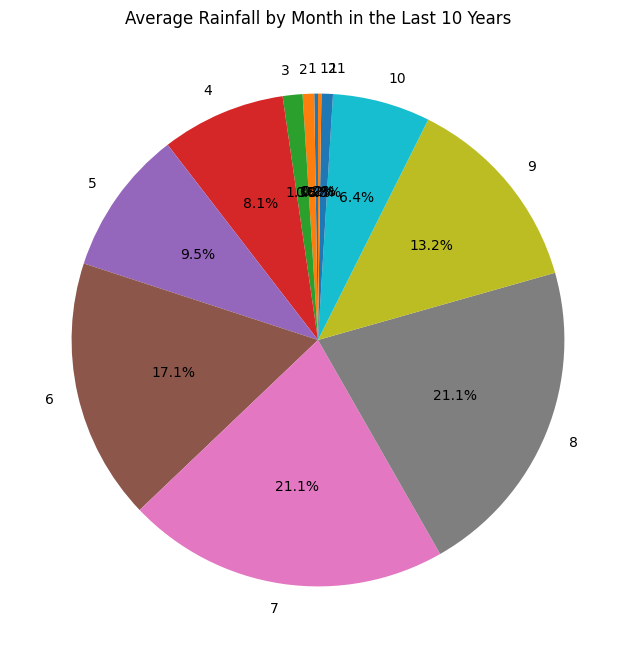

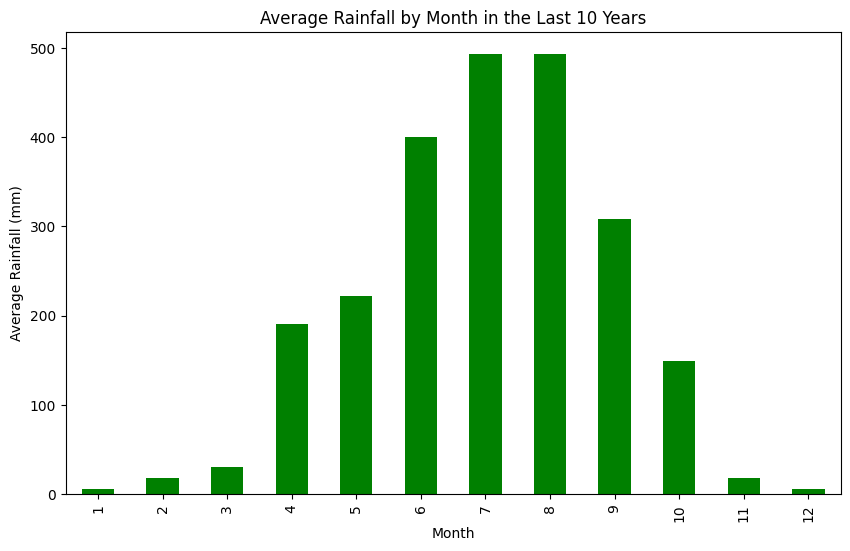

Month with the most average rainfall: 8 (Average Rainfall: 493.13 mm)
Month with the least average rainfall: 12 (Average Rainfall: 5.14 mm)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Bangladesh_Rain_dataset.csv')

last_10_years = df[df['Year'] >= (df['Year'].max() - 9)]

average_rainfall = last_10_years.groupby('Month')['rain'].mean()

plt.figure(figsize=(8, 8))
plt.pie(average_rainfall, labels=average_rainfall.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Rainfall by Month in the Last 10 Years')
plt.show()

plt.figure(figsize=(10, 6))
average_rainfall.plot(kind='bar', color='green')
plt.title('Average Rainfall by Month in the Last 10 Years')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.show()

max_rain_month = average_rainfall.idxmax()
max_rain_value = average_rainfall.max()

min_rain_month = average_rainfall.idxmin()
min_rain_value = average_rainfall.min()

print(f"Month with the most average rainfall: {max_rain_month} (Average Rainfall: {max_rain_value:.2f} mm)")
print(f"Month with the least average rainfall: {min_rain_month} (Average Rainfall: {min_rain_value:.2f} mm)")


Looks like in the last 10 years month numbe r8 which is August with the most average rainfall with approximatley 493.13 mm
And, lowest average rainfall month in the last 10 years is December or month number 12 with 5.14 mm

2. Take last 20 years of data. Average the temperature by each month and plot a scatter plot. Find out which month has the most average temperature.
Write your detailed observation.

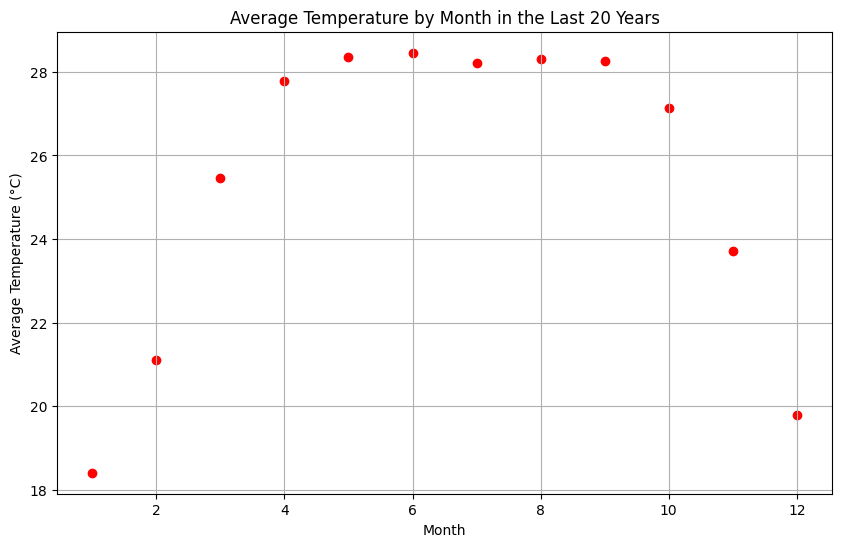

Month with the most average temperature: 6 (Average Temperature: 28.45 °C)


In [5]:
last_20_years = df[df['Year'] >= (df['Year'].max() - 19)]

average_temperature = last_20_years.groupby('Month')['tem'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(average_temperature.index, average_temperature.values, color='red')
plt.title('Average Temperature by Month in the Last 20 Years')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

max_temp_month = average_temperature.idxmax()
max_temp_value = average_temperature.max()

print(f"Month with the most average temperature: {max_temp_month} (Average Temperature: {max_temp_value:.2f} °C)")

In the last 20 years month number 6 which is June with the most average temperature in Bnagladesh.

3. Take last 15 years of data . Drop the year column. and Plot a box plot. From the box plot write your observation.
For example what is the highest and lowest rainfall? What is the median value of rainfall ? If there's any outliers in data?

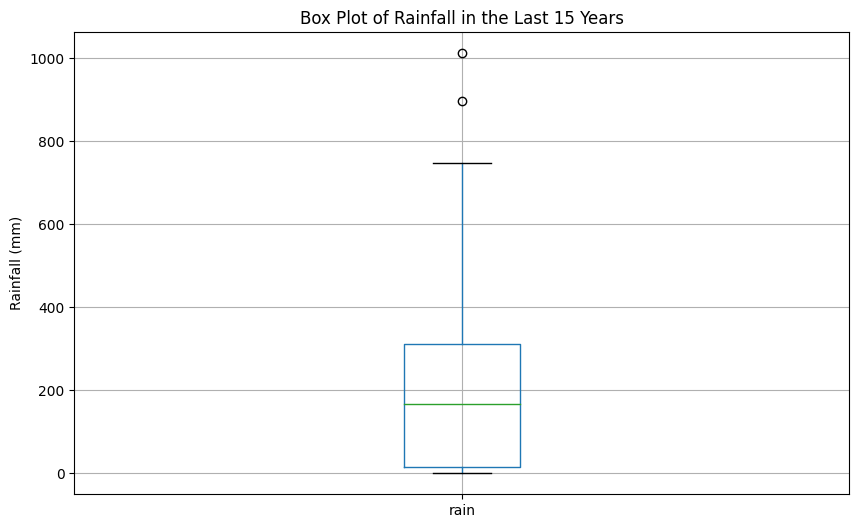

Highest Rainfall: 1012.02 mm
Lowest Rainfall: 0.00 mm
Median Rainfall: 167.10 mm
Number of Outliers: 2


In [7]:
last_15_years = df[df['Year'] >= (df['Year'].max() - 14)]

last_15_years = last_15_years.drop('Year', axis=1)

plt.figure(figsize=(10, 6))
last_15_years.boxplot(column='rain', showfliers=True)
plt.title('Box Plot of Rainfall in the Last 15 Years')
plt.ylabel('Rainfall (mm)')
plt.show()

highest_rainfall = last_15_years['rain'].max()
lowest_rainfall = last_15_years['rain'].min()
median_rainfall = last_15_years['rain'].median()

Q1 = last_15_years['rain'].quantile(0.25)
Q3 = last_15_years['rain'].quantile(0.75)
IQR = Q3 - Q1
outliers = last_15_years[(last_15_years['rain'] < (Q1 - 1.5 * IQR)) | (last_15_years['rain'] > (Q3 + 1.5 * IQR))]

print(f"Highest Rainfall: {highest_rainfall:.2f} mm")
print(f"Lowest Rainfall: {lowest_rainfall:.2f} mm")
print(f"Median Rainfall: {median_rainfall:.2f} mm")
print(f"Number of Outliers: {len(outliers)}")

4 .Show correlation heatmap between all the features.
In the text section describe what you have learned or discovered from the correlation heatmap in details.
Lets assume You have found out There's a positive correlation between year and temp. What does that mean? Does that mean when year is increasing the temperature is increasing also?

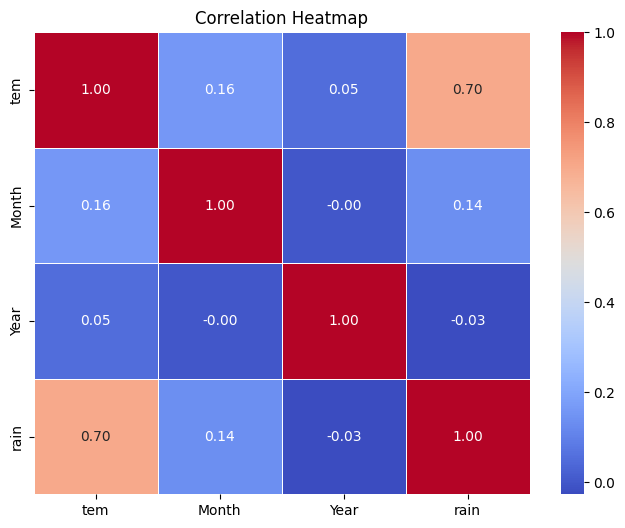

In [26]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


There's a positive correlation between temp and rain. That means when temp is increasing the rainfall is increasing also.